In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../source')

import matplotlib.pyplot as plt
import numpy as np
from kernel_fcns import C_h,C_w, Rg,Tw

In [2]:
delta = 1000.0/917.0-1
k = np.linspace(1e-2,1e1,1000)
beta0 = 1

In [3]:
Ch_1 = C_h(beta0,k/(2*np.pi))
Cw_1 = C_w(beta0,k/(2*np.pi))
R_1 = Rg(beta0,k/(2*np.pi))
T_1 = Tw(beta0,k/(2*np.pi))



Ch_2 = C_h(5e0*beta0,k/(2*np.pi))
Cw_2 = C_w(5e0*beta0,k/(2*np.pi))
R_2 = Rg(5e0*beta0,k/(2*np.pi))
T_2 = Tw(5e0*beta0,k/(2*np.pi))

Ch_3 = C_h(25e0*beta0,k/(2*np.pi))
Cw_3 = C_w(25e0*beta0,k/(2*np.pi))
R_3 = Rg(25e0*beta0,k/(2*np.pi))
T_3 = Tw(25e0*beta0,k/(2*np.pi))

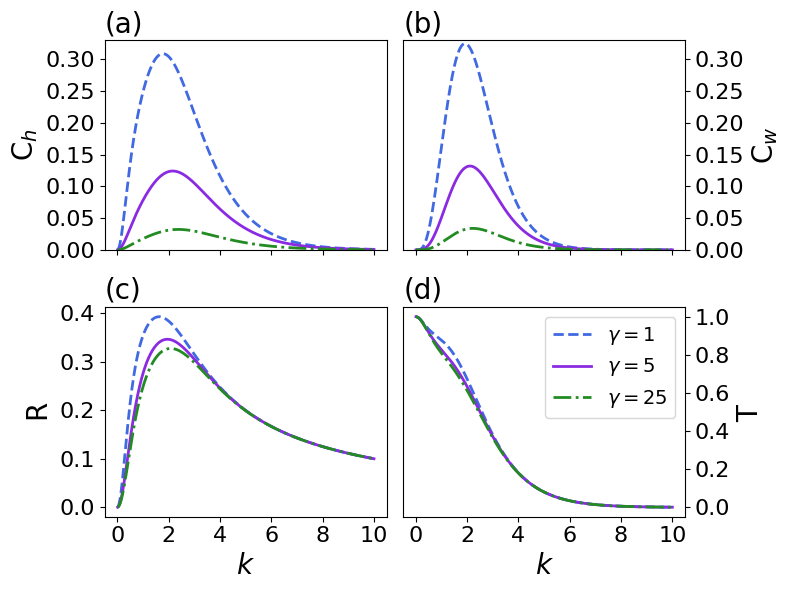

In [9]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.title(r'(a)',fontsize=20,loc='left')
plt.plot(k,Ch_1,color='royalblue',linewidth=2,linestyle='--')
plt.plot(k,Ch_2,color='blueviolet',linewidth=2,linestyle='-')
plt.plot(k,Ch_3,color='forestgreen',linewidth=2,linestyle='-.')
plt.yticks(fontsize=16)
plt.gca().xaxis.set_ticklabels([])
plt.ylabel(r'$\mathsf{C}_h$',fontsize=20)
plt.ylim(0,0.33)

plt.subplot(222)
plt.title(r'(b)',fontsize=20,loc='left')
plt.plot(k,Cw_1,color='royalblue',linewidth=2,label=r'$\gamma=1$',linestyle='--')
plt.plot(k,Cw_2,color='blueviolet',linewidth=2,label=r'$\gamma=10$',linestyle='-')
plt.plot(k,Cw_3,color='forestgreen',linewidth=2,linestyle='-.',label=r'$\gamma=100$')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel(r'$\mathsf{C}_w$',fontsize=20)
plt.gca().xaxis.set_ticklabels([])
plt.ylim(0,0.33)


plt.subplot(223)
plt.title(r'(c)',fontsize=20,loc='left')
plt.plot(k,R_1,color='royalblue',linewidth=2,label=r'$\gamma=1$',linestyle='--')
plt.plot(k,R_2,color='blueviolet',linewidth=2,label=r'$\gamma=10$',linestyle='-')
plt.plot(k,R_3,color='forestgreen',linewidth=2,linestyle='-.',label=r'$\gamma=100$')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel(r'$\mathsf{R}$',fontsize=20)
plt.xlabel(r'$k$',fontsize=20)


plt.subplot(224)
plt.title(r'(d)',fontsize=20,loc='left')
plt.plot(k,T_1,color='royalblue',linewidth=2,label=r'$\gamma=1$',linestyle='--')
plt.plot(k,T_2,color='blueviolet',linewidth=2,label=r'$\gamma=5$',linestyle='-')
plt.plot(k,T_3,color='forestgreen',linewidth=2,linestyle='-.',label=r'$\gamma=25$')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel(r'$\mathsf{T}$',fontsize=20)
plt.legend(fontsize=14,loc='upper right')
plt.tight_layout()
plt.savefig('fig2')
plt.show()
plt.close()

In [5]:
def Es(k,omega,lamda,beta0):
    Ch_ = C_h(beta0,k/(2*np.pi))
    Cw_ = C_w(beta0,k/(2*np.pi))
    R_ = Rg(beta0,k/(2*np.pi))
    T_ = Tw(beta0,k/(2*np.pi))
    return (1/lamda)*Cw_ - lamda*Ch_*T_/(omega**2 + (lamda*R_)**2)

def Ec(k,omega,lamda,beta0):
    Ch_ = C_h(beta0,k/(2*np.pi))
    Cw_ = C_w(beta0,k/(2*np.pi))
    R_ = Rg(beta0,k/(2*np.pi))
    T_ = Tw(beta0,k/(2*np.pi))
    return delta/omega + omega*Ch_*T_/(omega**2 + (lamda*R_)**2)

In [6]:
Es_0 = Es(k,0.5,1,beta0)
Ec_0 = Ec(k,0.5,1,beta0)

Es_1 = Es(k,1,1,beta0)
Ec_1 = Ec(k,1,1,beta0)

Es_2 = Es(k,2,1,beta0)
Ec_2 = Ec(k,2,1,beta0)

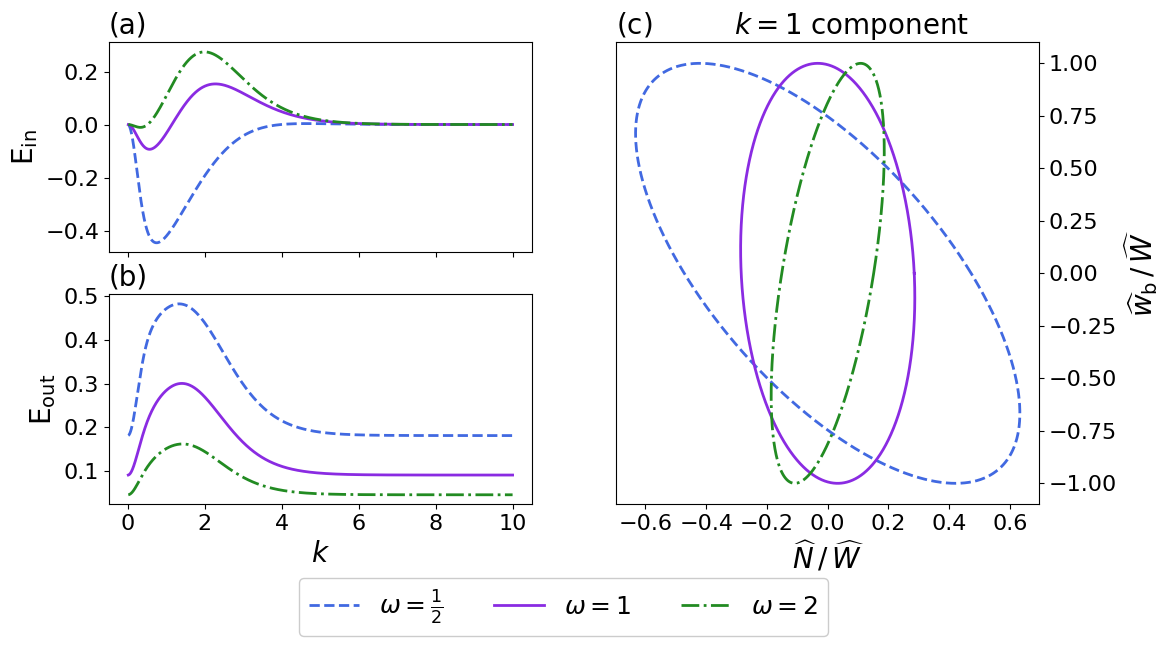

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(221)
plt.title(r'(a)',fontsize=20,loc='left')
plt.plot(k,Es_0,color='royalblue',linewidth=2,linestyle='--')
plt.plot(k,Es_1,color='blueviolet',linewidth=2,linestyle='-')
plt.plot(k,Es_2,color='forestgreen',linewidth=2,linestyle='-.')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel(r'$\mathsf{E}_\mathrm{in}$',fontsize=20)
plt.gca().xaxis.set_ticklabels([])

plt.subplot(223)
plt.title(r'(b)',fontsize=20,loc='left')
plt.plot(k,Ec_0,color='royalblue',linewidth=2,linestyle='--',label=r'$\omega=\frac{1}{2}$')
plt.plot(k,Ec_1,color='blueviolet',linewidth=2,linestyle='-',label=r'$\omega=1$')
plt.plot(k,Ec_2,color='forestgreen',linewidth=2,linestyle='-.',label=r'$\omega=2$')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel(r'$\mathsf{E}_\mathrm{out}$',fontsize=20)
plt.xlabel(r'$k$',fontsize=20)


plt.subplot(122)
plt.title(r'(c)$\quad\qquad k=1$ component',fontsize=20,loc='left')
omega=1
linestyles = ['--','-','-.']
colors = ['royalblue','blueviolet','forestgreen']
labels= [r'$\omega=\frac{1}{2}$',r'$\omega=1$',r'$\omega=2$']
j=0
for omega in [0.5,1,2]:
    t = np.linspace(0,2*np.pi/omega,2000)
    S = np.sin(omega*t) 
    Es_ = Es(k,omega,1,beta0)
    Ec_ = Ec(k,omega,1,beta0)

    l0 = np.argmin(np.abs(k-1))

    for l in [l0]:
        E = np.sin(omega*t) * Es_[l] +  np.cos(omega*t) * Ec_[l]
        plt.plot(E.flatten(),S.flatten(),linestyle=linestyles[j],color=colors[j],linewidth=2,label=labels[j])
    j+=1

plt.legend(fontsize=18,loc=(-0.75,-0.285),framealpha=1,ncol=3)
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel(r'$\widehat{w}_\mathrm{b}\,/\,\widehat{W}$',fontsize=20)
plt.xlabel(r'$\widehat{N}\,/\,\widehat{W}$',fontsize=20)
# plt.tight_layout()
plt.savefig('fig0',bbox_inches='tight')
plt.show()
plt.close()